In [1]:
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,BatchNormalization,Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\Users\pc\Desktop\final paper\Soil_Ferrtlity.csv', encoding='cp1252')

In [2]:
X = data.drop(['Fertility_Class', 'OC'],axis=1)
y = data['OC'].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [4]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

<ipython-input-4-f66fc4a953da>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
<ipython-input-4-f66fc4a953da>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


In [5]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [70]:
# having 14 neuron is based on the number of available features
model = Sequential()
model.add(Dense(22, input_dim=14, activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 22)                330       
                                                                 
 dense_49 (Dense)            (None, 22)                506       
                                                                 
 dense_50 (Dense)            (None, 22)                506       
                                                                 
 dense_51 (Dense)            (None, 22)                506       
                                                                 
 dense_52 (Dense)            (None, 1)                 23        
                                                                 
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=60)

Epoch 1/60
157/157 [==============================] - 4s 10ms/step - loss: 3.1056 - val_loss: 1.8552
Epoch 2/60
157/157 [==============================] - 1s 6ms/step - loss: 1.9341 - val_loss: 1.6538
Epoch 3/60
157/157 [==============================] - 1s 7ms/step - loss: 1.5717 - val_loss: 1.4970
Epoch 4/60
157/157 [==============================] - 1s 8ms/step - loss: 1.3708 - val_loss: 1.3700
Epoch 5/60
157/157 [==============================] - 1s 9ms/step - loss: 1.2076 - val_loss: 1.2470
Epoch 6/60
157/157 [==============================] - 1s 7ms/step - loss: 1.0790 - val_loss: 1.1325
Epoch 7/60
157/157 [==============================] - 1s 7ms/step - loss: 0.9776 - val_loss: 1.0672
Epoch 8/60
157/157 [==============================] - 1s 7ms/step - loss: 0.8826 - val_loss: 0.9255
Epoch 9/60
157/157 [==============================] - 1s 6ms/step - loss: 0.7942 - val_loss: 0.8415
Epoch 10/60
157/157 [==============================] - 1s 7ms/step - loss: 0.7178 - val_loss: 0.756

<AxesSubplot:>

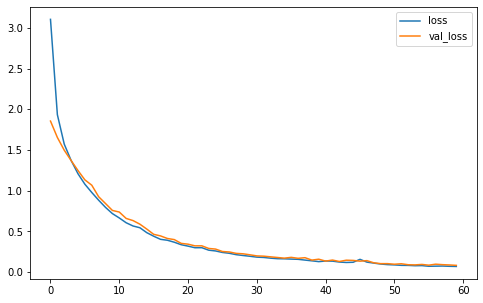

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(8,5))

In [73]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.19798158943952382
MSE: 0.08149626082848284
RMSE: 0.28547549952400963
VarScore: 0.9587354250488314


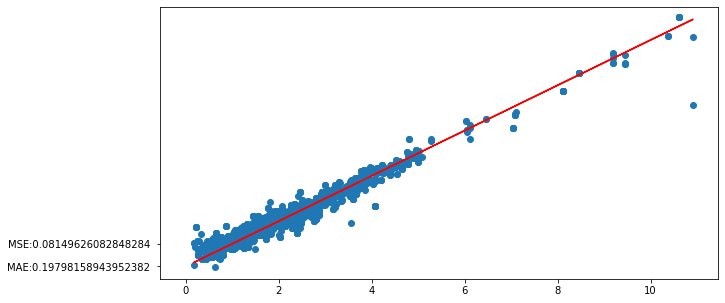

In [89]:
# Visualizing Our predictions
y_pred = model.predict(X_test)
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
import numpy as np
plt.plot("MAE:%r " % metrics.mean_absolute_error(y_test, y_pred))
plt.plot("MSE:%r " % metrics.mean_squared_error(y_test, y_pred))  

In [75]:
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))
print("MAE:%r " % metrics.mean_absolute_error(y_test, y_pred))
print("MSE:%r " % metrics.mean_squared_error(y_test, y_pred))  

RMS: 1.9426337943915464 
MAE:0.19798158943952382 
MSE:0.08149626082848284 


In [78]:
ANN_model = Sequential()
ANN_model.add(Dense(14, input_dim=14, activation='relu'))
ANN_model.add(Dense(14,activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(optimizer='Adam',loss='mse')
ANN_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 14)                210       
                                                                 
 dense_57 (Dense)            (None, 14)                210       
                                                                 
 dense_58 (Dense)            (None, 1)                 15        
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [79]:
ANN_model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=60)

Epoch 1/60
157/157 [==============================] - 4s 9ms/step - loss: 4.4398 - val_loss: 2.2571
Epoch 2/60
157/157 [==============================] - 1s 5ms/step - loss: 2.2573 - val_loss: 1.9465
Epoch 3/60
157/157 [==============================] - 1s 6ms/step - loss: 1.9202 - val_loss: 1.7992
Epoch 4/60
157/157 [==============================] - 1s 7ms/step - loss: 1.7324 - val_loss: 1.7223
Epoch 5/60
157/157 [==============================] - 1s 7ms/step - loss: 1.6441 - val_loss: 1.6847
Epoch 6/60
157/157 [==============================] - 1s 7ms/step - loss: 1.5888 - val_loss: 1.6501
Epoch 7/60
157/157 [==============================] - 1s 5ms/step - loss: 1.5515 - val_loss: 1.6243
Epoch 8/60
157/157 [==============================] - 1s 6ms/step - loss: 1.5193 - val_loss: 1.5996
Epoch 9/60
157/157 [==============================] - 1s 6ms/step - loss: 1.4910 - val_loss: 1.5725
Epoch 10/60
157/157 [==============================] - 1s 6ms/step - loss: 1.4625 - val_loss: 1.5554

<AxesSubplot:>

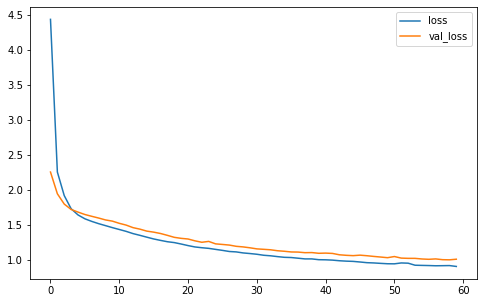

In [81]:
loss_df = pd.DataFrame(ANN_model.history.history)
loss_df.plot(figsize=(8,5))

In [83]:
import numpy as np
y_pred = ANN_model.predict(X_test)
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))
print("MAE:%r " % metrics.mean_absolute_error(y_test, y_pred))
print("MSE:%r " % metrics.mean_squared_error(y_test, y_pred))  

RMS: 1.7072696753190715 
MAE:0.750899928664799 
MSE:1.010978952042511 


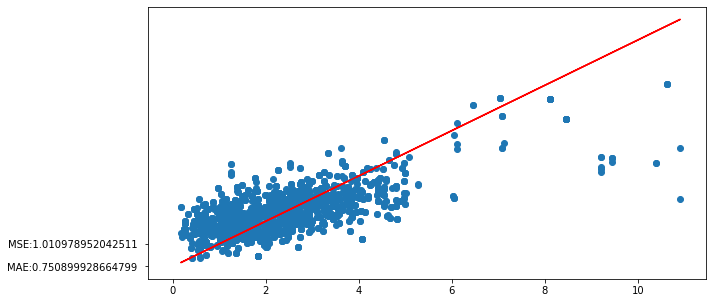

In [87]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.plot("MAE:%r " % metrics.mean_absolute_error(y_test, y_pred))
plt.plot("MSE:%r " % metrics.mean_squared_error(y_test, y_pred))